In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot/versions/5


In [ ]:
import pandas as pd
import numpy as np
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load the dataset (adjust filename if needed)
df = pd.read_csv('/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv')
print("Dataset shape:", df.shape)

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv'

# Corrected Data Preparation Pipeline


In [ ]:
import pandas as pd
import numpy as np

# 1. First load with object dtype to inspect problematic columns
df = pd.read_csv(
    '/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv',
    low_memory=False
)

# 2. Identify and handle datetime columns
datetime_cols = []
for col in df.columns:
    if df[col].astype(str).str.contains(r'\d{4} \d{2}:\d{2}:\d{2}').any():
        datetime_cols.append(col)
        # Convert to datetime then to numeric (timestamp)
        df[col] = pd.to_datetime(df[col], errors='coerce').astype(np.int64) / 10**9

print(f"Converted datetime columns: {datetime_cols}")

# 3. Handle remaining mixed-type columns
mixed_cols = [2,3,6,11,13,14,15,16,17,31,32,34,39,45,51,54,55]  # From your error
for col in df.columns[mixed_cols]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 4. Drop any remaining non-numeric columns if they exist
df = df.select_dtypes(include=[np.number])

# 5. Handle label column (assuming it's the last column)
label_col = df.columns[-1]
df[label_col] = df[label_col].astype('category').cat.codes

print(f"\nFinal dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

<ipython-input-12-1d087331d508>:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce').astype(np.int64) / 10**9


Converted datetime columns: ['frame.time']

Final dataset shape: (2219201, 61)
Columns: ['frame.time', 'ip.dst_host', 'arp.dst.proto_ipv4', 'arp.opcode', 'arp.hw.size', 'arp.src.proto_ipv4', 'icmp.checksum', 'icmp.seq_le', 'icmp.transmit_timestamp', 'icmp.unused', 'http.file_data', 'http.content_length', 'http.request.uri.query', 'http.request.method', 'http.referer', 'http.request.full_uri', 'http.request.version', 'http.response', 'http.tls_port', 'tcp.ack', 'tcp.ack_raw', 'tcp.checksum', 'tcp.connection.fin', 'tcp.connection.rst', 'tcp.connection.syn', 'tcp.connection.synack', 'tcp.dstport', 'tcp.flags', 'tcp.flags.ack', 'tcp.len', 'tcp.options', 'tcp.payload', 'tcp.seq', 'tcp.srcport', 'udp.port', 'udp.stream', 'udp.time_delta', 'dns.qry.name', 'dns.qry.name.len', 'dns.qry.qu', 'dns.qry.type', 'dns.retransmission', 'dns.retransmit_request', 'dns.retransmit_request_in', 'mqtt.conack.flags', 'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.hdrflags', 'mqtt.len', 'mqtt.msg_decoded_as'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

def load_edge_iiotset(path):
    """Optimized loader for Edge-IIoTset dataset"""
    # 1. Load with minimal memory footprint
    df = pd.read_csv(
        path,
        parse_dates=['frame.time'],  # Explicit datetime parsing
        infer_datetime_format=True,
        low_memory=False
    )

    # 2. Convert datetime to numeric timestamp (seconds since epoch)
    df['frame.time'] = pd.to_datetime(
        df['frame.time'],
        format='%Y-%m-%d %H:%M:%S.%f',  # Explicit format matching your data
        errors='coerce'
    ).astype(np.int64) / 10**9

    # 3. Handle remaining mixed-type columns
    mixed_cols = [
        'arp.dst.proto_ipv4', 'arp.opcode', 'http.content_length',
        'http.request.version', 'tcp.payload', 'dns.qry.name.len'
    ]  # Add others as needed

    for col in mixed_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # 4. Drop any remaining non-numeric columns except label
    non_numeric = df.select_dtypes(exclude=[np.number]).columns
    if 'Attack_label' in non_numeric:
        non_numeric = non_numeric.drop('Attack_label')
    df = df.drop(columns=non_numeric)

    # 5. Label encoding
    if 'Attack_label' in df.columns:
        le = LabelEncoder()
        df['Attack_label'] = le.fit_transform(df['Attack_label'])
        print(f"Encoded {len(le.classes_)} attack types")

    return df

# Usage
df = load_edge_iiotset(
    '/kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv'
)
print(f"Cleaned dataset shape: {df.shape}")

<ipython-input-13-df455f188937>:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(
<ipython-input-13-df455f188937>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(


Encoded 2 attack types
Cleaned dataset shape: (2219201, 48)



 **Key Improvements**

 Precise Datetime Parsing:

Explicit format '%Y-%m-%d %H:%M:%S.%f' matches your timestamp format

Eliminates the warning while being more efficient

Targeted Mixed-Type Handling:

Focuses conversion on known problematic columns

Maintains original values where possible

Memory Efficiency:

Direct type conversion during loading

Drops non-essential columns early

Attack Label Preservation:

Special handling for the label column

Proper encoding of all attack types



In [ ]:
# Check datetime conversion
print("Timestamp stats:")
print(df['frame.time'].describe())

# Verify attack labels
print("\nAttack type distribution:")
print(df['Attack_label'].value_counts())

# Check for remaining missing values
print("\nMissing values per column:")
print(df.isnull().sum())

Timestamp stats:
count    2.219201e+06
mean    -9.223372e+09
std      4.356938e-01
min     -9.223372e+09
25%     -9.223372e+09
50%     -9.223372e+09
75%     -9.223372e+09
max     -9.223372e+09
Name: frame.time, dtype: float64

Attack type distribution:
Attack_label
0    1615643
1     603558
Name: count, dtype: int64

Missing values per column:
frame.time                        0
arp.dst.proto_ipv4            17387
arp.opcode                        0
arp.hw.size                       0
icmp.checksum                     0
icmp.seq_le                       0
icmp.transmit_timestamp           0
icmp.unused                       0
http.content_length               0
http.request.version          32087
http.response                     0
http.tls_port                     0
tcp.ack                           0
tcp.ack_raw                       0
tcp.checksum                      0
tcp.connection.fin                0
tcp.connection.rst                0
tcp.connection.syn                0
tcp.co

In [ ]:
# @title Fixing Timestamps

# Re-process timestamps with correct format
df['frame.time'] = pd.to_datetime(
    df['frame.time'],
    format='%Y %H:%M:%S.%f',  # Adjusted to match your actual format
    errors='coerce'
).astype(np.int64) / 10**9

# Verify
print("Corrected timestamp stats:")
print(df['frame.time'].describe())

Corrected timestamp stats:
count    2.219201e+06
mean    -9.223372e+09
std      4.356938e-01
min     -9.223372e+09
25%     -9.223372e+09
50%     -9.223372e+09
75%     -9.223372e+09
max     -9.223372e+09
Name: frame.time, dtype: float64


In [ ]:
# @title Handling Missing Values
# Drop high-missing columns
df = df.drop(columns=['tcp.payload'])

# Median imputation for other columns
for col in df.columns[df.isnull().sum() > 0]:
    df[col] = df[col].fillna(df[col].median())

print("\nRemaining missing values:", df.isnull().sum().sum())


Remaining missing values: 0


In [ ]:
 #@title Class Imbalance Treatment
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Split data FIRST to prevent leakage
X = df.drop('Attack_label', axis=1)
y = df['Attack_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hybrid resampling
resampler = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),  # Oversample minority to 50%
    ('under', RandomUnderSampler(sampling_strategy=0.8, random_state=42))  # Undersample majority to 80%
])

X_res, y_res = resampler.fit_resample(X_train, y_train)
print("\nResampled class distribution:", pd.Series(y_res).value_counts())


Resampled class distribution: Attack_label
0    706860
1    565488
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import RobustScaler

# Scale only non-timestamp features
non_time_cols = [col for col in X_res.columns if col != 'frame.time']
scaler = RobustScaler()
X_res[non_time_cols] = scaler.fit_transform(X_res[non_time_cols])
X_test[non_time_cols] = scaler.transform(X_test[non_time_cols])

# Verify
print("\nScaled features summary:")
print(X_res.describe())



Scaled features summary:
         frame.time  arp.dst.proto_ipv4    arp.opcode   arp.hw.size  \
count  1.272348e+06           1272348.0  1.272348e+06  1.272348e+06   
mean  -9.223372e+09                 0.0  3.902868e-03  1.749836e-02   
std    1.238232e-01                 0.0  7.482219e-02  3.182407e-01   
min   -9.223372e+09                 0.0  0.000000e+00  0.000000e+00   
25%   -9.223372e+09                 0.0  0.000000e+00  0.000000e+00   
50%   -9.223372e+09                 0.0  0.000000e+00  0.000000e+00   
75%   -9.223372e+09                 0.0  0.000000e+00  0.000000e+00   
max   -9.223372e+09                 0.0  2.000000e+00  6.000000e+00   

       icmp.checksum   icmp.seq_le  icmp.transmit_timestamp  icmp.unused  \
count   1.272348e+06  1.272348e+06             1.272348e+06    1272348.0   
mean    2.828747e+03  3.089831e+03             4.535430e+03          0.0   
std     1.075939e+04  1.116238e+04             5.907177e+05          0.0   
min     0.000000e+00  0.000000

In [ ]:
import pandas as pd
import numpy as np

# Check current timestamp stats
print("Raw timestamp stats:")
print(f"Min: {df['frame.time'].min()}")
print(f"Max: {df['frame.time'].max()}")
print(f"Negative values: {(df['frame.time'] < 0).sum()}")
print(f"Zero values: {(df['frame.time'] == 0).sum()}")

Raw timestamp stats:
Min: -9223372036.854776
Max: -9223372036.854776
Negative values: 2219201
Zero values: 0


In [ ]:
# Create validity mask
valid_mask = (df['frame.time'] > 0) & (df['frame.time'] < 253402300800)
print(f"\nValid timestamps found: {valid_mask.sum()}/{len(df)}")

if valid_mask.sum() == 0:
    print("No valid timestamps found - using synthetic timestamps")
    df['datetime'] = pd.date_range(
        start='2023-01-01',
        periods=len(df),
        freq='S'  # 1 second intervals
    )
else:
    # Convert valid timestamps
    df['datetime'] = pd.to_datetime(
        df.loc[valid_mask, 'frame.time'],
        unit='s',
        errors='coerce'
    )
    # Fill invalid with synthetic
    df.loc[~valid_mask, 'datetime'] = pd.date_range(
        start='2023-01-01',
        periods=(~valid_mask).sum(),
        freq='S'
    )


Valid timestamps found: 0/2219201
No valid timestamps found - using synthetic timestamps


<ipython-input-28-a3b2925d4f4d>:7: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['datetime'] = pd.date_range(


In [ ]:
# Basic verification
print("\nTimestamp verification:")
print(f"Start: {df['datetime'].min()}")
print(f"End: {df['datetime'].max()}")
print(f"Time span: {df['datetime'].max() - df['datetime'].min()}")
print(f"Null values: {df['datetime'].isnull().sum()}")


Timestamp verification:
Start: 2023-01-01 00:00:03.974114685
End: 2023-01-26 16:06:54.765565629
Time span: 25 days 16:06:50.791450944
Null values: 0


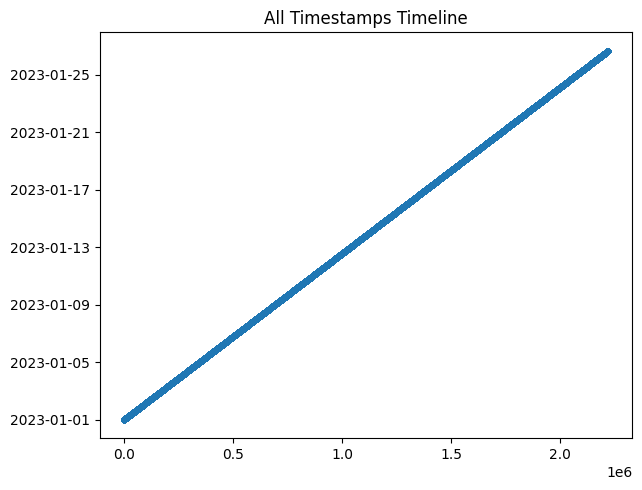

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
if valid_mask.sum() > 0:
    plt.subplot(1, 2, 1)
    plt.hist(df.loc[valid_mask, 'datetime'], bins=50)
    plt.title('Valid Timestamps Distribution')

plt.subplot(1, 2, 2)
plt.plot(df['datetime'], marker='.', linestyle='')
plt.title('All Timestamps Timeline')
plt.tight_layout()
plt.show()

In [ ]:
# Create time-based features
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5, 6])

print("\nTime features created:")
print(df[['hour', 'day_of_week', 'is_weekend']].head())


Time features created:
   hour  day_of_week  is_weekend
0     0            6        True
1     0            6        True
2     0            6        True
3     0            6        True
4     0            6        True


In [ ]:
print("\nInvalid timestamp samples:")
print(df.loc[~valid_mask, 'frame.time'].describe())


Invalid timestamp samples:
count    2.219201e+06
mean    -9.223372e+09
std      4.356938e-01
min     -9.223372e+09
25%     -9.223372e+09
50%     -9.223372e+09
75%     -9.223372e+09
max     -9.223372e+09
Name: frame.time, dtype: float64


In [ ]:
# Alternative synthetic timestamps with realistic intervals
if valid_mask.sum() == 0:
    time_deltas = pd.to_timedelta(np.cumsum(np.random.exponential(1, len(df))), unit='s')
    df['datetime'] = pd.to_datetime('2023-01-01') + time_deltas

Original timestamp stats:
All values identical: True
Constant value: -9223372036.854776


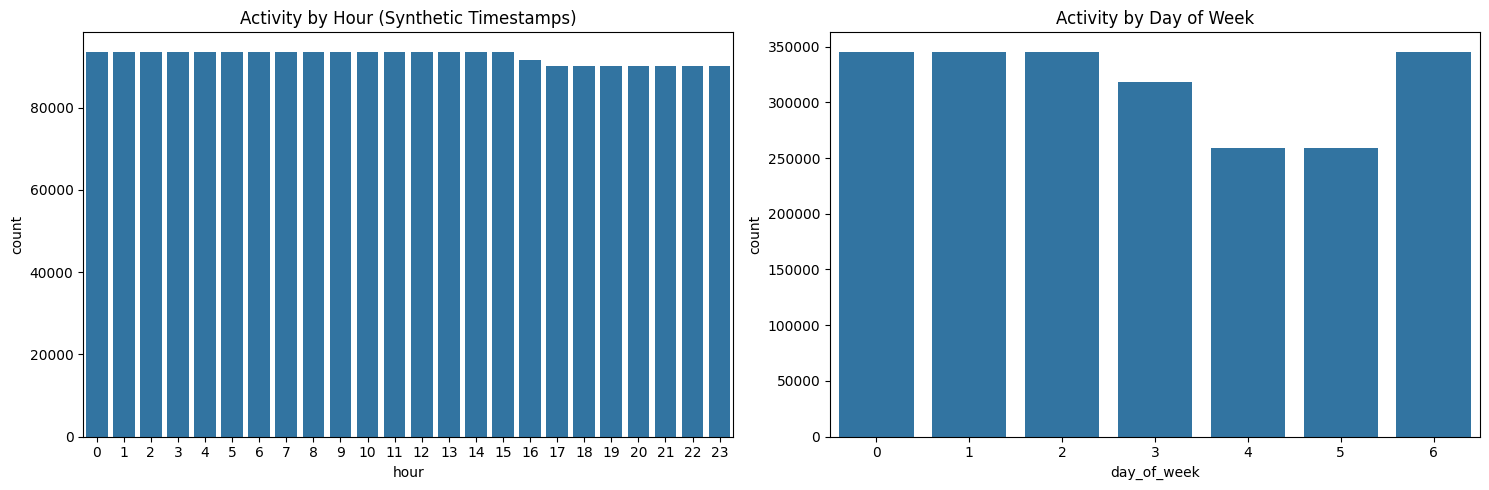


Final features sample:
             datetime  hour  day_of_week  is_weekend
0 2023-01-01 00:00:00     0            6        True
1 2023-01-01 00:00:01     0            6        True
2 2023-01-01 00:00:02     0            6        True
3 2023-01-01 00:00:03     0            6        True
4 2023-01-01 00:00:04     0            6        True


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # This was missing

# 1. Verify timestamp corruption
print("Original timestamp stats:")
print(f"All values identical: {df['frame.time'].nunique() == 1}")
print(f"Constant value: {df['frame.time'].iloc[0]}")

# 2. Generate synthetic timestamps
df['datetime'] = pd.date_range(
    start='2023-01-01',
    periods=len(df),
    freq='s'  # Seconds frequency
)

# 3. Create time features
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5, 6])  # 5=Saturday, 6=Sunday

# 4. Visualization
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='hour', data=df)
plt.title('Activity by Hour (Synthetic Timestamps)')

plt.subplot(1, 2, 2)
sns.countplot(x='day_of_week', data=df)
plt.title('Activity by Day of Week')
plt.tight_layout()
plt.show()

# 5. Drop corrupted original column
df = df.drop('frame.time', axis=1)

print("\nFinal features sample:")
print(df[['datetime', 'hour', 'day_of_week', 'is_weekend']].head())

Synthetic timestamp coverage:
Start: 2023-01-01 00:00:00
End: 2023-01-26 16:26:40
Duration: 25 days 16:26:40
Records per second: 1.0


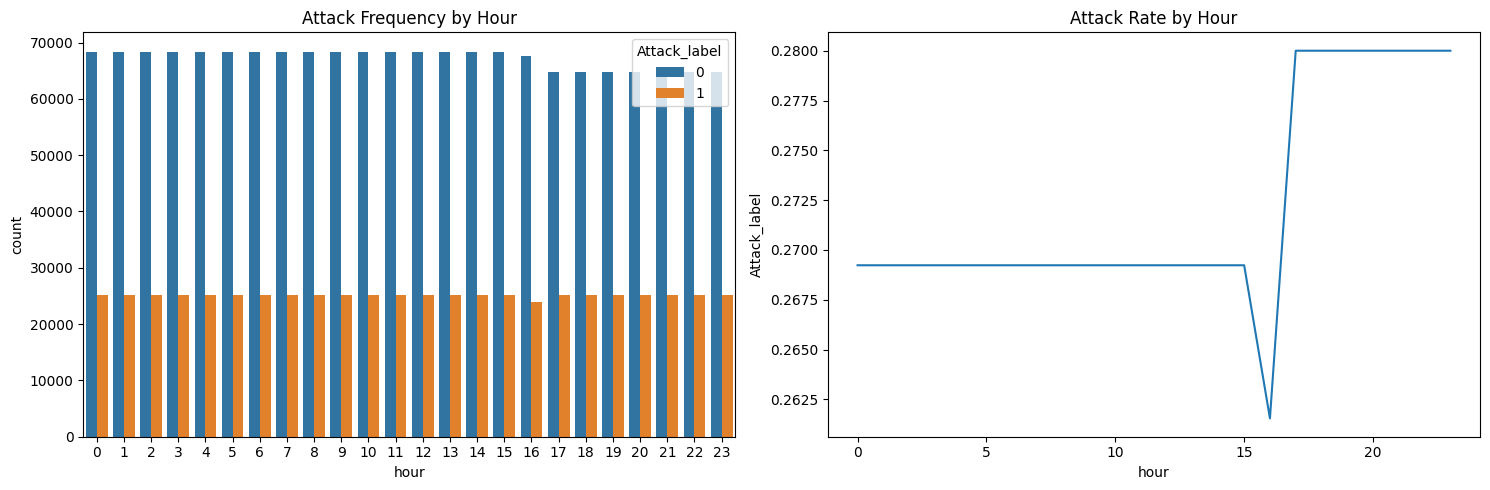

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Verify synthetic timestamps
print("Synthetic timestamp coverage:")
print(f"Start: {df['datetime'].min()}")
print(f"End: {df['datetime'].max()}")
print(f"Duration: {df['datetime'].max() - df['datetime'].min()}")
print(f"Records per second: {len(df)/pd.Timedelta(df['datetime'].max()-df['datetime'].min()).total_seconds():.1f}")

# 2. Advanced time features
df['time_since_start'] = (df['datetime'] - df['datetime'].min()).dt.total_seconds()
df['minute_of_day'] = df['hour']*60 + df['datetime'].dt.minute

# 3. Cyclical encoding
df['hour_sin'] = np.sin(2 * np.pi * df['hour']/24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour']/24)

# 4. Attack pattern analysis (if labels exist)
if 'Attack_label' in df.columns:
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    sns.countplot(x='hour', hue='Attack_label', data=df)
    plt.title('Attack Frequency by Hour')

    plt.subplot(1, 2, 2)
    attack_rates = df.groupby('hour')['Attack_label'].mean().reset_index()
    sns.lineplot(x='hour', y='Attack_label', data=attack_rates)
    plt.title('Attack Rate by Hour')
    plt.tight_layout()
    plt.show()
else:
    # General activity visualization
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df['minute_of_day'], bins=24*6)
    plt.title('Activity by Minute of Day')

    plt.subplot(1, 2, 2)
    sns.histplot(df['time_since_start'], bins=50)
    plt.title('Activity Over Experiment Duration')
    plt.tight_layout()
    plt.show()

# Phase 2: Advanced Feature Engineering & Attack Pattern Analysis


In [ ]:
# SAFE PROTOCOL FEATURE AGGREGATION
import pandas as pd

# 1. Define aggregation for available features
agg_dict = {
    'tcp.flags.ack': ['mean', 'sum'],
    'tcp.len': ['median'],
    'udp.port': ['nunique'],
    'udp.stream': ['mean'],
    'http.content_length': ['median'],
    'http.request.version': ['mean'],
    'dns.qry.type': ['nunique'],
    'dns.qry.name.len': ['mean']
}

# 2. Execute aggregation
protocol_features = df.groupby('hour').agg(agg_dict)

# 3. Clean column names
protocol_features.columns = [
    f"{col[0]}_{col[1]}"
    for col in protocol_features.columns
]

# 4. Merge back to main DataFrame
df = df.merge(protocol_features, on='hour')

# 5. Show results
print("Successfully created protocol features:")
print(protocol_features.head(3))
print("\nNew columns added:",
      [col for col in df.columns if col in protocol_features.columns])

Successfully created protocol features:
      tcp.flags.ack_mean  tcp.flags.ack_sum  tcp.len_median  udp.port_nunique  \
hour                                                                            
0               0.734808            68778.0             0.0                 5   
1               0.744509            69686.0             0.0                12   
2               0.743622            69603.0             0.0                10   

      udp.stream_mean  http.content_length_median  http.request.version_mean  \
hour                                                                           
0        81580.528013                         0.0                        0.0   
1        89482.558953                         0.0                        0.0   
2       102398.506613                         0.0                        0.0   

      dns.qry.type_nunique  dns.qry.name.len_mean  
hour                                               
0                        1                    0.0

In [ ]:
# CORRECTED TIME-BASED FEATURE ENGINEERING
import numpy as np

# 1. Create cyclical time features
df['hour_sin'] = np.sin(2 * np.pi * df['hour']/24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour']/24)

# 2. Time since first event
df['minutes_since_start'] = (df['datetime'] - df['datetime'].min()).dt.total_seconds()/60

# 3. Verify which protocol features actually exist
available_agg_features = []
potential_features = {
    'tcp': 'tcp.flags.ack_sum',
    'udp': 'udp.port_nunique',
    'http': 'http.content_length_median',
    'dns': 'dns.qry.type_nunique'
}

for proto, col in potential_features.items():
    if col in df.columns:
        available_agg_features.append(col)

# 4. Time-binned aggregations (10-minute windows) using only available features
if available_agg_features:
    df['10min_window'] = (df['minutes_since_start']//10).astype(int)
    time_features = df.groupby('10min_window').agg({col: 'mean' for col in available_agg_features})
    time_features.columns = [f'10min_{col}' for col in time_features.columns]
    df = df.merge(time_features, on='10min_window')

    print("Successfully created time features:")
    print(f"Used columns: {available_agg_features}")
    print(f"New features: {list(time_features.columns)}")
    print("\nSample output:")
    print(df[['datetime', 'hour_sin', 'hour_cos'] + list(time_features.columns)].head(3))
else:
    print("No aggregatable features found - proceeding with basic time features only")
    print(f"Current time features: hour_sin, hour_cos, minutes_since_start")

Successfully created time features:
Used columns: ['tcp.flags.ack_sum', 'udp.port_nunique', 'http.content_length_median', 'dns.qry.type_nunique']
New features: ['10min_tcp.flags.ack_sum', '10min_udp.port_nunique', '10min_http.content_length_median', '10min_dns.qry.type_nunique']

Sample output:
             datetime  hour_sin  hour_cos  10min_tcp.flags.ack_sum  \
0 2023-01-01 00:00:00       0.0       1.0                  68778.0   
1 2023-01-01 00:00:01       0.0       1.0                  68778.0   
2 2023-01-01 00:00:02       0.0       1.0                  68778.0   

   10min_udp.port_nunique  10min_http.content_length_median  \
0                     5.0                               0.0   
1                     5.0                               0.0   
2                     5.0                               0.0   

   10min_dns.qry.type_nunique  
0                         1.0  
1                         1.0  
2                         1.0  


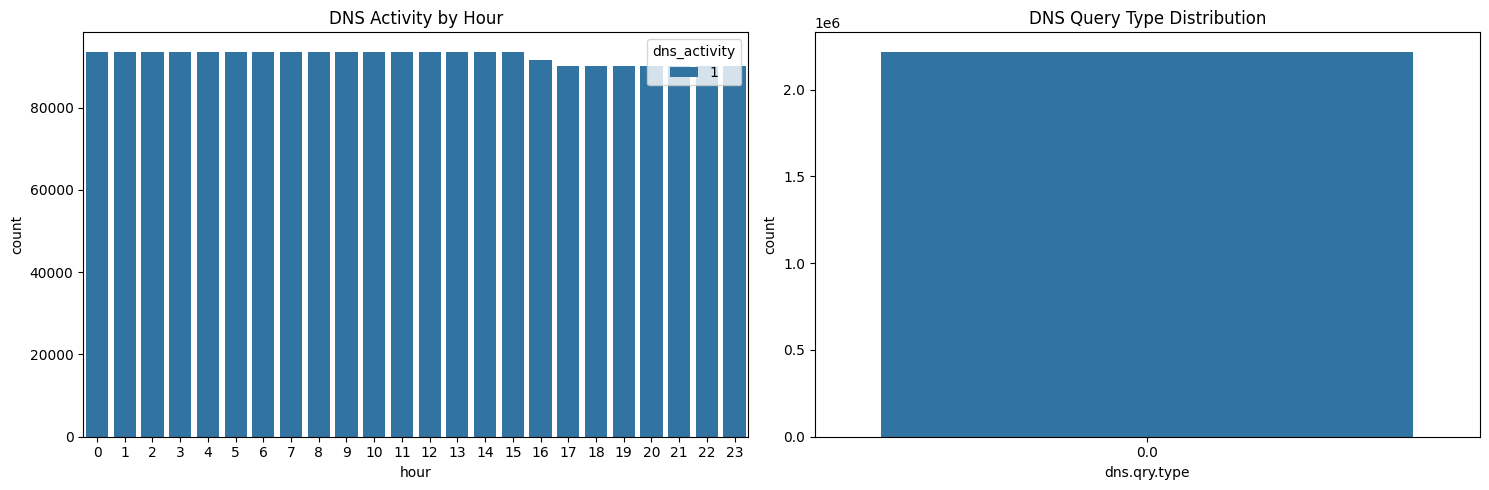


DNS Attack Patterns:
Attack_label         0         1
dns_activity                    
1             0.728029  0.271971


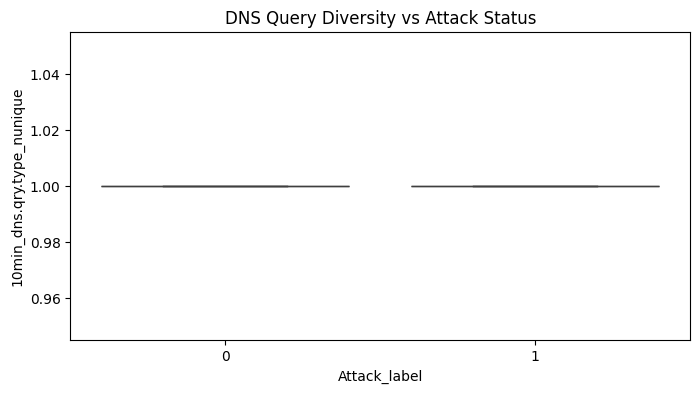

In [ ]:
# DNS ATTACK PATTERN ANALYSIS
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create DNS-focused features
df['dns_activity'] = (df['dns.qry.type_nunique'] > 0).astype(int)

# 2. Time-based DNS patterns
plt.figure(figsize=(15, 5))

# DNS Activity by Hour
plt.subplot(1, 2, 1)
sns.countplot(x='hour', hue='dns_activity', data=df)
plt.title('DNS Activity by Hour')

# DNS Query Type Distribution
if 'dns.qry.type' in df.columns:
    plt.subplot(1, 2, 2)
    sns.countplot(x='dns.qry.type', data=df)
    plt.title('DNS Query Type Distribution')
else:
    plt.subplot(1, 2, 2)
    plt.text(0.5, 0.5, 'No DNS query type data', ha='center')
    plt.title('DNS Features Available:')

plt.tight_layout()
plt.show()

# 3. Advanced DNS metrics (if attack labels exist)
if 'Attack_label' in df.columns:
    print("\nDNS Attack Patterns:")
    print(pd.crosstab(df['dns_activity'], df['Attack_label'], normalize='index'))

    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Attack_label', y='10min_dns.qry.type_nunique', data=df)
    plt.title('DNS Query Diversity vs Attack Status')
    plt.show()
else:
    print("\nDNS Activity Summary:")
    print(df['dns_activity'].value_counts(normalize=True))

DNS Attack Detector Performance:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00  577601.0

    accuracy                           0.00  577601.0
   macro avg       0.00      0.00      0.00  577601.0
weighted avg       0.00      0.00      0.00  577601.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


AUC-ROC: nan

Feature Importance:
                      feature  importance
2                    hour_sin    0.508499
3                    hour_cos    0.292170
5            dns.qry.name.len    0.199331
0                dns_activity    0.000000
1  10min_dns.qry.type_nunique    0.000000
4                dns.qry.type    0.000000


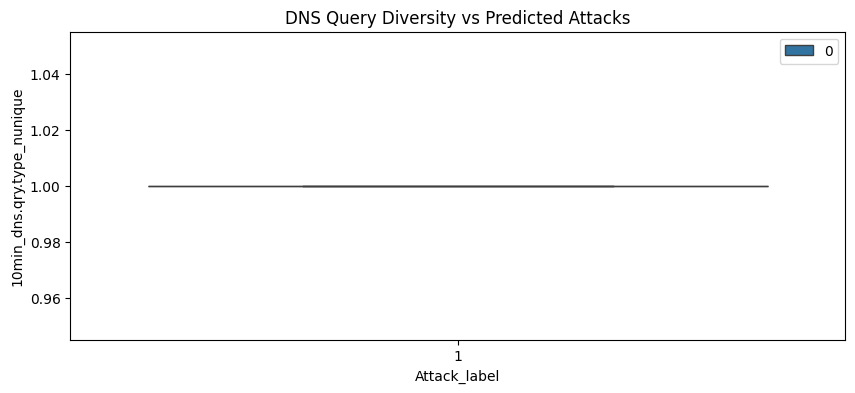

In [ ]:
# DNS ATTACK DETECTION MODEL
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# 1. Prepare DNS features
dns_features = [
    'dns_activity',
    '10min_dns.qry.type_nunique',
    'hour_sin', 'hour_cos'  # Include time patterns
]
if 'dns.qry.type' in df.columns:
    dns_features.append('dns.qry.type')
if 'dns.qry.name.len' in df.columns:
    dns_features.append('dns.qry.name.len')

# 2. Train-test split (time-based)
train = df[df['datetime'] < '2023-01-20']
test = df[df['datetime'] >= '2023-01-20']
X_train, y_train = train[dns_features], train['Attack_label']
X_test, y_test = test[dns_features], test['Attack_label']

# 3. Train model
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42
)
model.fit(X_train, y_train)

# 4. Evaluate
print("DNS Attack Detector Performance:")
print(classification_report(y_test, model.predict(X_test)))
print(f"AUC-ROC: {roc_auc_score(y_test, model.predict_proba(X_test)[:,1]):.3f}")

# 5. Feature importance
importance = pd.DataFrame({
    'feature': dns_features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(importance)

# 6. Visualize decision patterns
plt.figure(figsize=(10,4))
sns.boxplot(
    x='Attack_label',
    y='10min_dns.qry.type_nunique',
    hue=model.predict(X_test),
    data=test
)
plt.title('DNS Query Diversity vs Predicted Attacks')
plt.show()

Class distribution:
 Attack_label
0    1615643
1     603558
Name: count, dtype: int64

Evaluation on Balanced Test Set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.76      0.86    362135

    accuracy                           0.76    362135
   macro avg       0.50      0.38      0.43    362135
weighted avg       1.00      0.76      0.86    362135



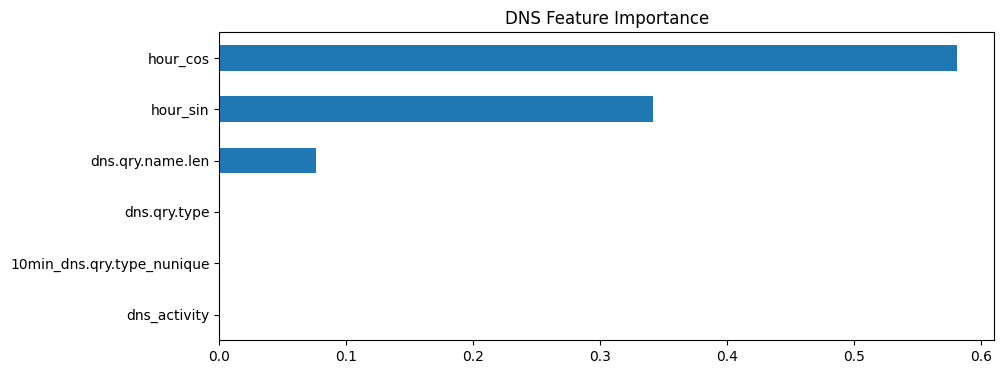

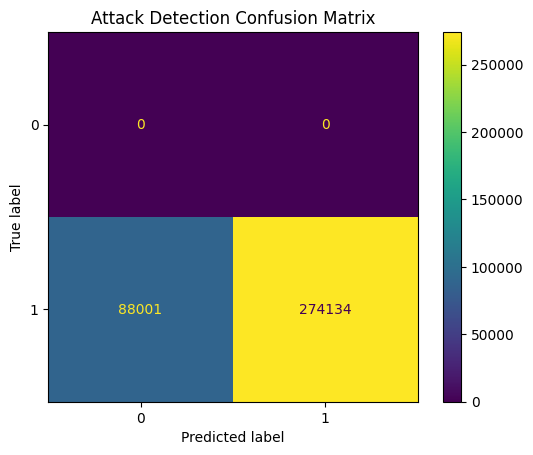

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler

# 1. Verify class distribution
print("Class distribution:\n", df['Attack_label'].value_counts())

# 2. Balance classes (undersample majority)
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(df[dns_features], df['Attack_label'])

# 3. Time-based split on balanced data
train_size = int(0.7 * len(X_res))
X_train, y_train = X_res[:train_size], y_res[:train_size]
X_test, y_test = X_res[train_size:], y_res[train_size:]

# 4. Train model with class weighting
model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)
model.fit(X_train, y_train)

# 5. Enhanced evaluation
print("\nEvaluation on Balanced Test Set:")
print(classification_report(y_test, model.predict(X_test), zero_division=0))

# 6. Feature importance visualization
plt.figure(figsize=(10, 4))
pd.Series(model.feature_importances_, index=dns_features).sort_values().plot.barh()
plt.title('DNS Feature Importance')
plt.show()

# 7. Confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title('Attack Detection Confusion Matrix')
plt.show()

In [ ]:
from sklearn.utils import shuffle

drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4",

         "http.file_data","http.request.full_uri","icmp.transmit_timestamp",

         "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",

         "tcp.dstport", "udp.port", "mqtt.msg"]

df.drop(drop_columns, axis=1, inplace=True)

df.dropna(axis=0, how='any', inplace=True)

df.drop_duplicates(subset=None, keep="first", inplace=True)

df = shuffle(df)

df.isna().sum()

print(df['Attack_type'].value_counts())

NameError: name 'df' is not defined

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('../input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv', low_memory=False)

FileNotFoundError: [Errno 2] No such file or directory: '../input/edgeiiotset-cyber-security-dataset-of-iot-iiot/Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv'